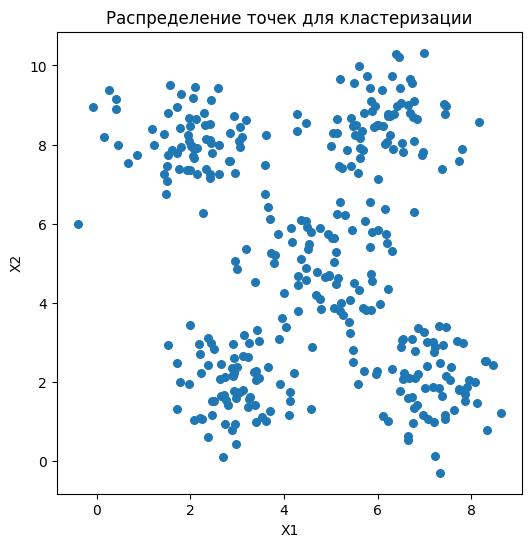

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1.1 Загрузка данных
data = np.loadtxt('data/data_clustering.txt', delimiter=',')

# 1.2 Визуальная оценка
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], s=30)
plt.title("Распределение точек для кластеризации")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


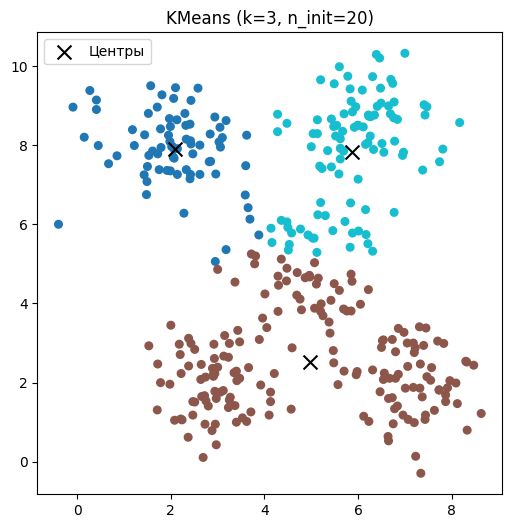

In [10]:

# 1.3 Запуск KMeans
k = 3  # например, после визуального анализа выбрали 3 кластера
km = KMeans(n_clusters=k, n_init=20, random_state=42)
labels_km = km.fit_predict(data)

# 1.4 Визуализация результатов
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_km, s=30, cmap='tab10')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='black', s=100, marker='x', label='Центры')
plt.title(f"KMeans (k={k}, n_init=20)")
plt.legend()
plt.show()


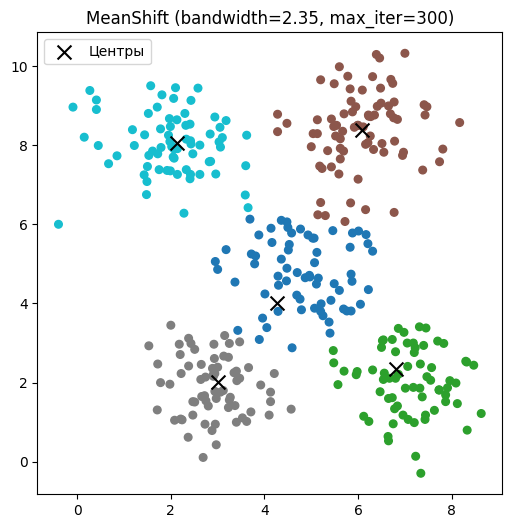

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# 2.1 Данные уже загружены (data)
# 2.2 Оценка bandwidth
bw = estimate_bandwidth(data, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bw, max_iter=300)
labels_ms = ms.fit_predict(data)
centers_ms = ms.cluster_centers_

# 2.3 Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_ms, s=30, cmap='tab10')
plt.scatter(centers_ms[:, 0], centers_ms[:, 1],
            c='black', s=100, marker='x', label='Центры')
plt.title(f"MeanShift (bandwidth={bw:.2f}, max_iter=300)")
plt.legend()
plt.show()


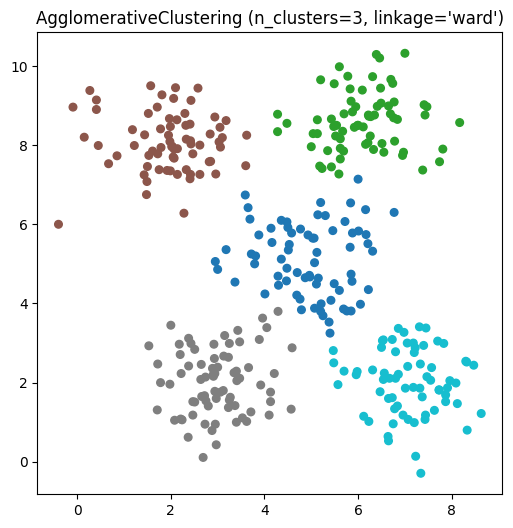

In [15]:
from sklearn.cluster import AgglomerativeClustering

# 3.1 Данные уже есть
# 3.2–3.3 Запуск с евклидовым расстоянием и, скажем, linkage='ward'
agg = AgglomerativeClustering(n_clusters=5,  metric = 'euclidean', linkage='ward')
labels_agg = agg.fit_predict(data)

# 3.4 Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_agg, s=30, cmap='tab10')
plt.title("AgglomerativeClustering (n_clusters=3, linkage='ward')")
plt.show()


In [16]:
from sklearn.metrics import davies_bouldin_score

db_km  = davies_bouldin_score(data, labels_km)
db_ms  = davies_bouldin_score(data, labels_ms)
db_agg = davies_bouldin_score(data, labels_agg)

print("Davies–Bouldin Index:")
print(f"  KMeans:                {db_km:.3f}")
print(f"  MeanShift:             {db_ms:.3f}")
print(f"  AgglomerativeClustering: {db_agg:.3f}")


Davies–Bouldin Index:
  KMeans:                0.680
  MeanShift:             0.563
  AgglomerativeClustering: 0.558


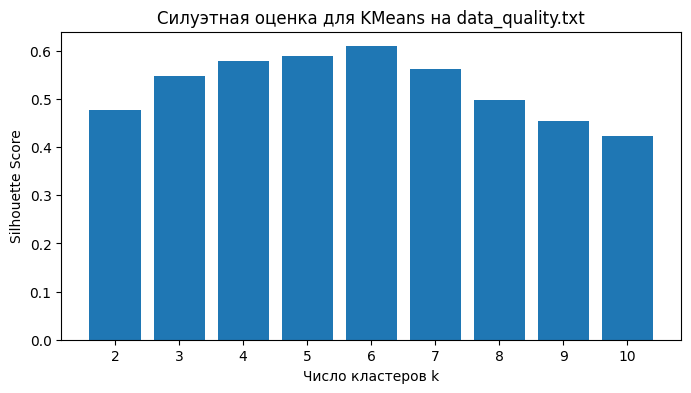

Оптимальное число кластеров по силуэту: 6


In [19]:
import pandas as pd
from sklearn.metrics import silhouette_score

# 5.1 Загрузка второго набора
data_q = np.loadtxt('data/data_quality.txt', delimiter=',')

# 5.2 Вычисление силуэта для разных k
sil_scores = []
k_list = list(range(2, 11))
for k in k_list:
    km_q = KMeans(n_clusters=k, n_init=20, random_state=42)
    lbl = km_q.fit_predict(data_q)
    sil_scores.append(silhouette_score(data_q, lbl))

# 5.3 Построение гистограммы зависимости
plt.figure(figsize=(8, 4))
plt.bar(k_list, sil_scores)
plt.xlabel("Число кластеров k")
plt.ylabel("Silhouette Score")
plt.title("Силуэтная оценка для KMeans на data_quality.txt")
plt.xticks(k_list)
plt.show()

# Определение оптимального k
best_k = k_list[np.argmax(sil_scores)]
print(f"Оптимальное число кластеров по силуэту: {best_k}")
